In [1]:
import pandas as pd
import numpy as np
from keras.models import Sequential,Model
from keras.layers import Dense, Dropout, Activation, Flatten, LSTM, TimeDistributed, RepeatVector,Input
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
from keras.utils import to_categorical
%matplotlib inline

Using TensorFlow backend.
C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\user10\Anaconda3\envs\P

# data preprocessing

In [51]:
df = pd.read_csv('./data/3227_2.csv')
df

,DealPrice,DealQty,BidQty1,Bid1,Ask1,AskQty1,BidQty2,Bid2,Ask2,AskQty2,...,AskQty3,BidQty4,Bid4,Ask4,AskQty4,BidQty5,Bid5,Ask5,AskQty5,TxTime
0,115.5,1,15,115.5,116.5,26,87,115.0,117.0,20,...,6,71,114.0,118.0,18,36,113.5,118.5,2,2020-03-23 09:08:06.460680485+08:00
1,116.0,1,15,115.5,116.5,26,87,115.0,117.0,20,...,6,71,114.0,118.0,18,36,113.5,118.5,2,2020-03-23 09:08:08.768889666+08:00
2,0.0,0,15,115.5,116.0,1,87,115.0,116.5,26,...,20,71,114.0,117.5,6,36,113.5,118.0,18,2020-03-23 09:08:09.170290232+08:00
3,116.0,1,15,115.5,116.5,26,87,115.0,117.0,20,...,6,71,114.0,118.0,18,36,113.5,118.5,2,2020-03-23 09:08:09.231770277+08:00
4,0.0,0,16,115.5,116.0,4,87,115.0,116.5,26,...,20,71,114.0,117.5,6,36,113.5,118.0,18,2020-03-23 09:08:10.171725035+08:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245835,0.0,0,99,167.0,167.5,24,74,166.5,168.0,163,...,154,158,165.5,169.0,277,146,165.0,169.5,134,2020-04-14 13:24:55.537633419+08:00
245836,167.5,2,99,167.0,167.5,22,74,166.5,168.0,163,...,154,158,165.5,169.0,277,146,165.0,169.5,134,2020-04-14 13:24:56.358870506+08:00
245837,167.5,5,99,167.0,167.5,17,74,166.5,168.0,163,...,154,158,165.5,169.0,277,146,165.0,169.5,134,2020-04-14 13:24:56.954796314+08:00
245838,167.5,1,99,167.0,167.5,16,74,166.5,168.0,163,...,154,158,165.5,169.0,277,146,165.0,169.5,134,2020-04-14 13:24:59.297884464+08:00


In [17]:
(df['Ask1'] == 0).sum()

1660

In [18]:
(df['Bid1'] == 0).sum()

0

In [19]:
(df['BidQty1'] == 0).sum()

223

In [20]:
(df['AskQty1'] == 0).sum()

1838

In [52]:
ask0 = df[df['Ask1'] == 0]
ask0

,DealPrice,DealQty,BidQty1,Bid1,Ask1,AskQty1,BidQty2,Bid2,Ask2,AskQty2,...,AskQty3,BidQty4,Bid4,Ask4,AskQty4,BidQty5,Bid5,Ask5,AskQty5,TxTime
43185,142.0,100,42,141.5,0.0,0,59,141.0,0.0,0,...,0,60,140.0,0.0,0,66,139.5,0.0,0,2020-03-25 12:01:31.815237999+08:00
43186,0.0,0,100,141.5,0.0,0,42,141.5,0.0,0,...,0,51,140.5,0.0,0,60,140.0,0.0,0,2020-03-25 12:01:31.970935822+08:00
43187,0.0,0,100,141.5,0.0,0,42,141.5,0.0,0,...,0,51,140.5,0.0,0,64,140.0,0.0,0,2020-03-25 12:01:32.011809111+08:00
43188,0.0,0,250,141.5,0.0,0,42,141.5,0.0,0,...,0,51,140.5,0.0,0,64,140.0,0.0,0,2020-03-25 12:01:32.503365278+08:00
43189,0.0,0,280,141.5,0.0,0,42,141.5,0.0,0,...,0,51,140.5,0.0,0,64,140.0,0.0,0,2020-03-25 12:01:32.749125004+08:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164142,156.5,1,492,156.5,0.0,0,409,156.5,0.0,0,...,0,56,155.5,0.0,0,85,155.0,0.0,0,2020-04-06 13:24:48.136556864+08:00
164143,0.0,0,492,156.5,0.0,0,412,156.5,0.0,0,...,0,56,155.5,0.0,0,85,155.0,0.0,0,2020-04-06 13:24:50.210183620+08:00
164144,0.0,0,492,156.5,0.0,0,412,156.5,0.0,0,...,0,56,155.5,0.0,0,84,155.0,0.0,0,2020-04-06 13:24:51.721580982+08:00
164145,0.0,0,492,156.5,0.0,0,412,156.5,0.0,0,...,0,57,155.5,0.0,0,84,155.0,0.0,0,2020-04-06 13:24:51.721580982+08:00


In [54]:
ask0['TxTime'] = [str(x)[0:10] for x in ask0['TxTime']]

C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [70]:
df['TxTime'] = [str(x)[0:10] for x in df['TxTime']]

In [78]:
len(df)

245840

In [80]:
#找出各個收盤的index
for i in range(len(df) - 1):
    if df['TxTime'].iloc[i + 1] != df['TxTime'].iloc[i]:
        print(i)

9745
26072
46891
69240
90482
105678
120621
140580
164146
187412
206727
221057
231442


In [82]:
close_idx = [9745, 26072, 46891, 69240, 90482, 105678, 120621, 140580, 164146, 187412, 206727, 221057, 231442]
ask0_index = ask0.index

In [86]:
ask0_index & close_idx

Int64Index([46891, 164146], dtype='int64')

In [89]:
df_train.iloc[46890]

DealPrice                 0
DealQty                   0
BidQty1                  32
Bid1                    144
Ask1                  144.5
                   ...     
dbq5_dt                   0
return                    0
equity_value              0
pred_return    -1.70767e-05
side                      0
Name: 46890, Length: 71, dtype: object

In [88]:
df_train.iloc[46891]

DealPrice                 0
DealQty                   0
BidQty1                  32
Bid1                    144
Ask1                  144.5
                   ...     
dbq5_dt                   0
return                    0
equity_value              0
pred_return    -6.13928e-06
side                      0
Name: 46891, Length: 71, dtype: object

In [90]:
df_train.iloc[164145]

DealPrice                 0
DealQty                   0
BidQty1                   4
Bid1                    161
Ask1                  161.5
                   ...     
dbq5_dt                   0
return                    0
equity_value              0
pred_return    -9.21637e-06
side                      0
Name: 164145, Length: 71, dtype: object

In [91]:
df_train.iloc[164146]

DealPrice                 0
DealQty                   0
BidQty1                   4
Bid1                    161
Ask1                  161.5
                   ...     
dbq5_dt                   0
return                    0
equity_value              0
pred_return    -2.52835e-05
side                      0
Name: 164146, Length: 71, dtype: object

In [ ]:
#收盤漲停不影響策略，因為剛好那時不會做買賣

In [23]:
(ask0['Ask2'] != 0).sum()

0

In [24]:
(ask0['Ask3'] != 0).sum()

0

In [25]:
(ask0['Ask4'] != 0).sum()

0

In [26]:
(ask0['Ask5'] != 0).sum()

0

In [27]:
df[df['BidQty1'] == 0]

,DealPrice,DealQty,BidQty1,Bid1,Ask1,AskQty1,BidQty2,Bid2,Ask2,AskQty2,...,AskQty3,BidQty4,Bid4,Ask4,AskQty4,BidQty5,Bid5,Ask5,AskQty5,TxTime
35,116.0,3,0,116.0,116.5,26,26,115.5,117.0,20,...,7,60,114.5,118.0,18,72,114.0,118.5,2,2020-03-23 09:08:30.993093967+08:00
42,116.0,1,0,116.0,116.5,26,19,115.5,117.0,18,...,8,60,114.5,118.0,18,72,114.0,118.5,2,2020-03-23 09:08:37.195630550+08:00
338,117.5,1,0,117.5,118.0,14,28,117.0,118.5,22,...,30,22,116.0,119.5,32,25,115.5,120.0,35,2020-03-23 09:11:52.455017805+08:00
1059,117.0,3,0,117.0,117.5,20,57,116.5,118.0,36,...,40,42,115.5,119.0,101,161,115.0,119.5,79,2020-03-23 09:20:54.186246872+08:00
1166,119.0,1,0,119.0,119.5,60,44,118.5,120.0,60,...,30,42,117.5,121.0,42,82,117.0,121.5,39,2020-03-23 09:41:11.066711664+08:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240421,166.0,2,0,166.0,166.5,119,0,0.0,0.0,0,...,0,0,0.0,0.0,0,0,0.0,0.0,0,2020-04-14 11:50:11.450603247+08:00
243805,168.0,27,0,168.0,168.5,150,0,0.0,0.0,0,...,0,0,0.0,0.0,0,0,0.0,0.0,0,2020-04-14 12:58:08.658483028+08:00
243806,167.5,49,0,168.0,168.5,150,0,0.0,0.0,0,...,0,0,0.0,0.0,0,0,0.0,0.0,0,2020-04-14 12:58:08.658483028+08:00
243807,167.0,18,0,168.0,168.5,150,0,0.0,0.0,0,...,0,0,0.0,0.0,0,0,0.0,0.0,0,2020-04-14 12:58:08.658483028+08:00


In [28]:
askq0 = df[df['AskQty1'] == 0]

In [30]:
askq0[askq0['Ask1'] != 0]

,DealPrice,DealQty,BidQty1,Bid1,Ask1,AskQty1,BidQty2,Bid2,Ask2,AskQty2,...,AskQty3,BidQty4,Bid4,Ask4,AskQty4,BidQty5,Bid5,Ask5,AskQty5,TxTime
615,117.5,1,44,117.0,117.5,0,20,116.5,118.0,23,...,25,24,115.5,119.0,33,99,115.0,119.5,56,2020-03-23 09:14:24.465106010+08:00
2938,115.0,1,52,114.5,115.0,0,154,114.0,115.5,30,...,23,168,113.0,116.5,26,185,112.5,117.0,36,2020-03-23 10:26:03.908962011+08:00
4089,116.0,1,49,115.5,116.0,0,114,115.0,116.5,28,...,74,235,114.0,117.5,73,103,113.5,118.0,102,2020-03-23 10:49:51.639563322+08:00
6397,118.0,1,35,117.5,118.0,0,54,117.0,118.5,74,...,107,115,116.0,119.5,102,81,115.5,120.0,121,2020-03-23 11:50:37.096253157+08:00
6547,118.0,1,29,117.5,118.0,0,55,117.0,118.5,59,...,116,108,116.0,119.5,102,83,115.5,120.0,118,2020-03-23 11:56:58.499157429+08:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232987,165.5,49,1,165.0,165.5,0,0,0.0,0.0,0,...,0,0,0.0,0.0,0,0,0.0,0.0,0,2020-04-14 09:12:24.816828251+08:00
233201,165.5,2,34,165.0,165.5,0,0,0.0,0.0,0,...,0,0,0.0,0.0,0,0,0.0,0.0,0,2020-04-14 09:14:18.434612513+08:00
236033,164.5,1,45,164.0,164.5,0,0,0.0,0.0,0,...,0,0,0.0,0.0,0,0,0.0,0.0,0,2020-04-14 09:55:29.697956085+08:00
243820,166.5,1,23,166.0,166.5,0,0,0.0,0.0,0,...,0,0,0.0,0.0,0,0,0.0,0.0,0,2020-04-14 12:58:09.062270403+08:00


In [31]:
df[df['BidQty1'] == 0]

,DealPrice,DealQty,BidQty1,Bid1,Ask1,AskQty1,BidQty2,Bid2,Ask2,AskQty2,...,AskQty3,BidQty4,Bid4,Ask4,AskQty4,BidQty5,Bid5,Ask5,AskQty5,TxTime
35,116.0,3,0,116.0,116.5,26,26,115.5,117.0,20,...,7,60,114.5,118.0,18,72,114.0,118.5,2,2020-03-23 09:08:30.993093967+08:00
42,116.0,1,0,116.0,116.5,26,19,115.5,117.0,18,...,8,60,114.5,118.0,18,72,114.0,118.5,2,2020-03-23 09:08:37.195630550+08:00
338,117.5,1,0,117.5,118.0,14,28,117.0,118.5,22,...,30,22,116.0,119.5,32,25,115.5,120.0,35,2020-03-23 09:11:52.455017805+08:00
1059,117.0,3,0,117.0,117.5,20,57,116.5,118.0,36,...,40,42,115.5,119.0,101,161,115.0,119.5,79,2020-03-23 09:20:54.186246872+08:00
1166,119.0,1,0,119.0,119.5,60,44,118.5,120.0,60,...,30,42,117.5,121.0,42,82,117.0,121.5,39,2020-03-23 09:41:11.066711664+08:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240421,166.0,2,0,166.0,166.5,119,0,0.0,0.0,0,...,0,0,0.0,0.0,0,0,0.0,0.0,0,2020-04-14 11:50:11.450603247+08:00
243805,168.0,27,0,168.0,168.5,150,0,0.0,0.0,0,...,0,0,0.0,0.0,0,0,0.0,0.0,0,2020-04-14 12:58:08.658483028+08:00
243806,167.5,49,0,168.0,168.5,150,0,0.0,0.0,0,...,0,0,0.0,0.0,0,0,0.0,0.0,0,2020-04-14 12:58:08.658483028+08:00
243807,167.0,18,0,168.0,168.5,150,0,0.0,0.0,0,...,0,0,0.0,0.0,0,0,0.0,0.0,0,2020-04-14 12:58:08.658483028+08:00


In [32]:
(df[df['BidQty1'] == 0]['DealQty'] == 0).sum()

0

In [33]:
(askq0[askq0['Ask1'] != 0]['DealQty'] == 0).sum()

0

In [35]:
(askq0[askq0['Ask1'] != 0]['DealPrice'] == askq0[askq0['Ask1'] != 0]['Ask1']).sum()

178

In [36]:
(df[df['BidQty1'] == 0]['DealPrice'] == df[df['BidQty1'] == 0]['Bid1']).sum()

220

In [39]:
df[df['BidQty1'] == 0][df[df['BidQty1'] == 0]['DealPrice'] != df[df['BidQty1'] == 0]['Bid1']]

,DealPrice,DealQty,BidQty1,Bid1,Ask1,AskQty1,BidQty2,Bid2,Ask2,AskQty2,...,AskQty3,BidQty4,Bid4,Ask4,AskQty4,BidQty5,Bid5,Ask5,AskQty5,TxTime
164446,163.0,22,0,163.5,164.0,134,22,163.0,164.5,37,...,69,33,162.0,165.5,8,41,161.5,166.0,38,2020-04-07 09:00:25.801476717+08:00
243806,167.5,49,0,168.0,168.5,150,0,0.0,0.0,0,...,0,0,0.0,0.0,0,0,0.0,0.0,0,2020-04-14 12:58:08.658483028+08:00
243807,167.0,18,0,168.0,168.5,150,0,0.0,0.0,0,...,0,0,0.0,0.0,0,0,0.0,0.0,0,2020-04-14 12:58:08.658483028+08:00


In [40]:
#data 3227_2
#會發生bid1/ask1有價格，但是沒有量的情形(bidqty1/askqty1 = 0)
#這些時候都會有成交價、量，而成交價都為bid1/ask1。
#(除了上列3筆成交價不為bid1，其餘都為bid1)

In [2]:
df = pd.read_csv('./data/3227_2.csv')
#data preprocessing
df['spread1'] = df['Ask1'] - df['Bid1']
df['spread2'] = df['Ask2'] - df['Bid2']
df['spread3'] = df['Ask3'] - df['Bid3']
df['spread4'] = df['Ask4'] - df['Bid4']
df['spread5'] = df['Ask5'] - df['Bid5']
df['mid1'] = (df['Ask1'] + df['Bid1']) / 2
df['mid2'] = (df['Ask2'] + df['Bid2']) / 2
df['mid3'] = (df['Ask3'] + df['Bid3']) / 2
df['mid4'] = (df['Ask4'] + df['Bid4']) / 2
df['mid5'] = (df['Ask5'] + df['Bid5']) / 2
df['a51_diff'] = df['Ask5'] - df['Ask1']
df['b15_diff'] = df['Bid1'] - df['Bid5']
df['a21_diff_abs'] = np.abs(df['Ask2'] - df['Ask1'])
df['a32_diff_abs'] = np.abs(df['Ask2'] - df['Ask1'])
df['a43_diff_abs'] = np.abs(df['Ask2'] - df['Ask1'])
df['a54_diff_abs'] = np.abs(df['Ask2'] - df['Ask1'])
df['b21_diff_abs'] = np.abs(df['Bid2'] - df['Bid1'])
df['b32_diff_abs'] = np.abs(df['Bid3'] - df['Bid2'])
df['b43_diff_abs'] = np.abs(df['Bid4'] - df['Bid3'])
df['b54_diff_abs'] = np.abs(df['Bid5'] - df['Bid4'])
df['a_mean'] = (df['Ask1'] +df['Ask2'] +df['Ask3'] +df['Ask4'] +df['Ask5']) / 5
df['b_mean'] = (df['Bid1'] +df['Bid2'] +df['Bid3'] +df['Bid4'] +df['Bid5']) / 5
df['aq_mean'] = (df['AskQty1'] +df['AskQty2'] +df['AskQty3'] +df['AskQty4'] +df['AskQty5']) / 5
df['bq_mean'] = (df['BidQty1'] +df['BidQty2'] +df['BidQty3'] +df['BidQty4'] +df['BidQty5']) / 5
df['p_acc_diff'] = (df['Ask1'] - df['Bid1']) + (df['Ask1'] - df['Bid1']) +(df['Ask2'] - df['Bid2']) + (df['Ask3'] - df['Bid3']) + (df['Ask4'] - df['Bid4']) + (df['Ask5'] - df['Bid5'])
df['q_acc_diff'] = (df['AskQty1'] - df['BidQty1']) + (df['AskQty1'] - df['BidQty1']) +(df['AskQty2'] - df['BidQty2']) + (df['AskQty3'] - df['BidQty3']) + (df['AskQty4'] - df['BidQty4']) + (df['AskQty5'] - df['BidQty5'])
df['da1_dt'] = df['Ask1'] - df['Ask1'].shift(1)
df['da2_dt'] = df['Ask2'] - df['Ask2'].shift(1)
df['da3_dt'] = df['Ask3'] - df['Ask3'].shift(1)
df['da4_dt'] = df['Ask4'] - df['Ask4'].shift(1)
df['da5_dt'] = df['Ask5'] - df['Ask5'].shift(1)
df['db1_dt'] = df['Bid1'] - df['Bid1'].shift(1)
df['db2_dt'] = df['Bid2'] - df['Bid2'].shift(1)
df['db3_dt'] = df['Bid3'] - df['Bid3'].shift(1)
df['db4_dt'] = df['Bid4'] - df['Bid4'].shift(1)
df['db5_dt'] = df['Bid5'] - df['Bid5'].shift(1)
df['daq1_dt'] = df['AskQty1'] - df['AskQty1'].shift(1)
df['daq2_dt'] = df['AskQty2'] - df['AskQty2'].shift(1)
df['daq3_dt'] = df['AskQty3'] - df['AskQty3'].shift(1)
df['daq4_dt'] = df['AskQty4'] - df['AskQty4'].shift(1)
df['daq5_dt'] = df['AskQty5'] - df['AskQty5'].shift(1)
df['dbq1_dt'] = df['BidQty1'] - df['BidQty1'].shift(1)
df['dbq2_dt'] = df['BidQty2'] - df['BidQty2'].shift(1)
df['dbq3_dt'] = df['BidQty3'] - df['BidQty3'].shift(1)
df['dbq4_dt'] = df['BidQty4'] - df['BidQty4'].shift(1)
df['dbq5_dt'] = df['BidQty5'] - df['BidQty5'].shift(1)
df = df.drop([0])
df = df.reset_index(drop = True)
#b43_diff_abs and b54_diff_abs are all same values -> drop
df = df.drop(['b43_diff_abs'], axis = 1)
df = df.drop(['b54_diff_abs'], axis = 1)
from datetime import datetime
df['TxTime'] = pd.to_datetime(df['TxTime'])
df['TxTime'] = [str(x)[0:10] for x in df['TxTime']]
#some index's ask1 = 0, we change that mid1 to bid1
idx = df[df['Ask1'] == 0].index
for i in idx:
    df['mid1'].iloc[i] = df['Bid1'].iloc[i]
#return(response) 放在最後一行
df['return'] = df['mid1'] / df['mid1'].shift(1) -1
df = df.drop([0])
df = df.reset_index(drop = True)

C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [3]:
df.isnull().sum().sum()

0

In [4]:
#少了4/13的data，先drop掉4/14的
df['TxTime'].unique()

array(['2020-03-23', '2020-03-24', '2020-03-25', '2020-03-26',
       '2020-03-27', '2020-03-30', '2020-03-31', '2020-04-01',
       '2020-04-06', '2020-04-07', '2020-04-08', '2020-04-09',
       '2020-04-10', '2020-04-14'], dtype=object)

In [5]:
df = df[df['TxTime'] != '2020-04-14']
df

,DealPrice,DealQty,BidQty1,Bid1,Ask1,AskQty1,BidQty2,Bid2,Ask2,AskQty2,...,daq2_dt,daq3_dt,daq4_dt,daq5_dt,dbq1_dt,dbq2_dt,dbq3_dt,dbq4_dt,dbq5_dt,return
0,0.0,0,15,115.5,116.0,1,87,115.0,116.5,26,...,6.0,14.0,-12.0,16.0,0.0,0.0,0.0,0.0,0.0,-0.002155
1,116.0,1,15,115.5,116.5,26,87,115.0,117.0,20,...,-6.0,-14.0,12.0,-16.0,0.0,0.0,0.0,0.0,0.0,0.002160
2,0.0,0,16,115.5,116.0,4,87,115.0,116.5,26,...,6.0,14.0,-12.0,16.0,1.0,0.0,0.0,0.0,0.0,-0.002155
3,115.5,1,15,115.5,116.0,4,87,115.0,116.5,26,...,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.000000
4,116.0,1,15,115.5,116.0,3,87,115.0,116.5,26,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231436,0.0,0,29,163.5,164.0,72,68,163.0,164.5,71,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000
231437,0.0,0,29,163.5,164.0,72,69,163.0,164.5,71,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000
231438,0.0,0,29,163.5,164.0,72,69,163.0,164.5,71,...,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.000000
231439,0.0,0,29,163.5,164.0,72,70,163.0,164.5,71,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000


In [6]:
#drop TxTime
df2 = df.drop(['TxTime'], axis = 1)
df2

,DealPrice,DealQty,BidQty1,Bid1,Ask1,AskQty1,BidQty2,Bid2,Ask2,AskQty2,...,daq2_dt,daq3_dt,daq4_dt,daq5_dt,dbq1_dt,dbq2_dt,dbq3_dt,dbq4_dt,dbq5_dt,return
0,0.0,0,15,115.5,116.0,1,87,115.0,116.5,26,...,6.0,14.0,-12.0,16.0,0.0,0.0,0.0,0.0,0.0,-0.002155
1,116.0,1,15,115.5,116.5,26,87,115.0,117.0,20,...,-6.0,-14.0,12.0,-16.0,0.0,0.0,0.0,0.0,0.0,0.002160
2,0.0,0,16,115.5,116.0,4,87,115.0,116.5,26,...,6.0,14.0,-12.0,16.0,1.0,0.0,0.0,0.0,0.0,-0.002155
3,115.5,1,15,115.5,116.0,4,87,115.0,116.5,26,...,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.000000
4,116.0,1,15,115.5,116.0,3,87,115.0,116.5,26,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231436,0.0,0,29,163.5,164.0,72,68,163.0,164.5,71,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000
231437,0.0,0,29,163.5,164.0,72,69,163.0,164.5,71,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000
231438,0.0,0,29,163.5,164.0,72,69,163.0,164.5,71,...,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.000000
231439,0.0,0,29,163.5,164.0,72,70,163.0,164.5,71,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000


In [7]:
idx = df['TxTime'].unique()
idx

array(['2020-03-23', '2020-03-24', '2020-03-25', '2020-03-26',
       '2020-03-27', '2020-03-30', '2020-03-31', '2020-04-01',
       '2020-04-06', '2020-04-07', '2020-04-08', '2020-04-09',
       '2020-04-10'], dtype=object)

In [8]:
idx[0:10]

array(['2020-03-23', '2020-03-24', '2020-03-25', '2020-03-26',
       '2020-03-27', '2020-03-30', '2020-03-31', '2020-04-01',
       '2020-04-06', '2020-04-07'], dtype=object)

In [9]:
idx[10:]

array(['2020-04-08', '2020-04-09', '2020-04-10'], dtype=object)

In [10]:
df[df['TxTime'] == idx[9]]['TxTime']

164145    2020-04-07
164146    2020-04-07
164147    2020-04-07
164148    2020-04-07
164149    2020-04-07
             ...    
187406    2020-04-07
187407    2020-04-07
187408    2020-04-07
187409    2020-04-07
187410    2020-04-07
Name: TxTime, Length: 23266, dtype: object

In [14]:
df.iloc[0:187411]

,DealPrice,DealQty,BidQty1,Bid1,Ask1,AskQty1,BidQty2,Bid2,Ask2,AskQty2,...,daq2_dt,daq3_dt,daq4_dt,daq5_dt,dbq1_dt,dbq2_dt,dbq3_dt,dbq4_dt,dbq5_dt,return
0,0.0,0,15,115.5,116.0,1,87,115.0,116.5,26,...,6.0,14.0,-12.0,16.0,0.0,0.0,0.0,0.0,0.0,-0.002155
1,116.0,1,15,115.5,116.5,26,87,115.0,117.0,20,...,-6.0,-14.0,12.0,-16.0,0.0,0.0,0.0,0.0,0.0,0.002160
2,0.0,0,16,115.5,116.0,4,87,115.0,116.5,26,...,6.0,14.0,-12.0,16.0,1.0,0.0,0.0,0.0,0.0,-0.002155
3,115.5,1,15,115.5,116.0,4,87,115.0,116.5,26,...,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.000000
4,116.0,1,15,115.5,116.0,3,87,115.0,116.5,26,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187406,0.0,0,3,164.5,165.0,11,43,164.0,165.5,65,...,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,0.0,0.0,0.000000
187407,0.0,0,3,164.5,165.0,17,43,164.0,165.5,59,...,-6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
187408,0.0,0,4,164.5,165.0,17,43,164.0,165.5,59,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000
187409,165.0,10,4,164.5,165.0,7,43,164.0,165.5,59,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [13]:
df.iloc[0:187412]['TxTime']

0         2020-03-23
1         2020-03-23
2         2020-03-23
3         2020-03-23
4         2020-03-23
             ...    
187407    2020-04-07
187408    2020-04-07
187409    2020-04-07
187410    2020-04-07
187411    2020-04-08
Name: TxTime, Length: 187412, dtype: object

# Def

In [15]:
#Def
#normalize
def normalize(df):
    norm = df.apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))
    return norm
#scale back to the true range
def true_range(df, x):
    X = (x * (df['return'].max() - df['return'].min())) + df['return'].min()
    return X
#rolling windows
def train_windows(df, ref_day=5, predict_day=1):
    X_train, Y_train = [], []
    for i in range(df.shape[0]-predict_day-ref_day):
        X_train.append(np.array(df.iloc[i:i+ref_day,:-1]))
        Y_train.append(np.array(df.iloc[i+ref_day:i+ref_day+predict_day]["return"]))
    return np.array(X_train), np.array(Y_train)
#L2 norm(MSE)
#LSTM (when add the drop out layer in order to deal with overfitting)
def lstm_stock_model(shape):
    model = Sequential()
    #return sequence = True -> means the network will have long memory
    model.add(LSTM(256, input_shape=(shape[1], shape[2]), return_sequences=True))
    model.add(LSTM(256, return_sequences=True))
    model.add(Dropout(0.5))
    model.add(TimeDistributed(Dense(1)))
    model.add(Flatten())
    model.add(Dense(5,activation='linear'))
    model.add(Dense(1,activation='linear'))
    model.compile(loss="mean_squared_error", optimizer="adam",metrics=['mean_squared_error'])
    model.summary()
    return model

# model

In [16]:
#model setting
#adjust the parameters in lstm
batch_size = [128, 256, 512]
validation_split = [0.1, 0.2, 0.3]
#normalize
norm_df = normalize(df2)
#train test split (10 days / 3 days)
test = norm_df.iloc[187411: ]
test = test.reset_index(drop = True)
train = norm_df.iloc[0:187411]
#10 ticks forecast next tick
X_train, Y_train = train_windows(train, 10, 1)
X_test, Y_test = train_windows(test, 10, 1)

In [18]:
#model
#adding drop out layer(pct = 0.5)
#batch size = 256
#early stop -> val loss patience = 10
model_1 = lstm_stock_model(X_train.shape)
callback = EarlyStopping(monitor="val_mean_squared_error", patience=10, verbose=1, mode="min")
history_1 = model_1.fit(X_train, Y_train, epochs=500, batch_size=batch_size[2], validation_split=validation_split[2], callbacks=[callback], shuffle=True)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 10, 256)           330752    
_________________________________________________________________
lstm_2 (LSTM)                (None, 10, 256)           525312    
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 256)           0         
_________________________________________________________________
time_distributed_1 (TimeDist (None, 10, 1)             257       
_________________________________________________________________
flatten_1 (Flatten)          (None, 10)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                

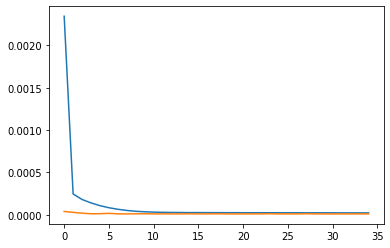

In [19]:
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])

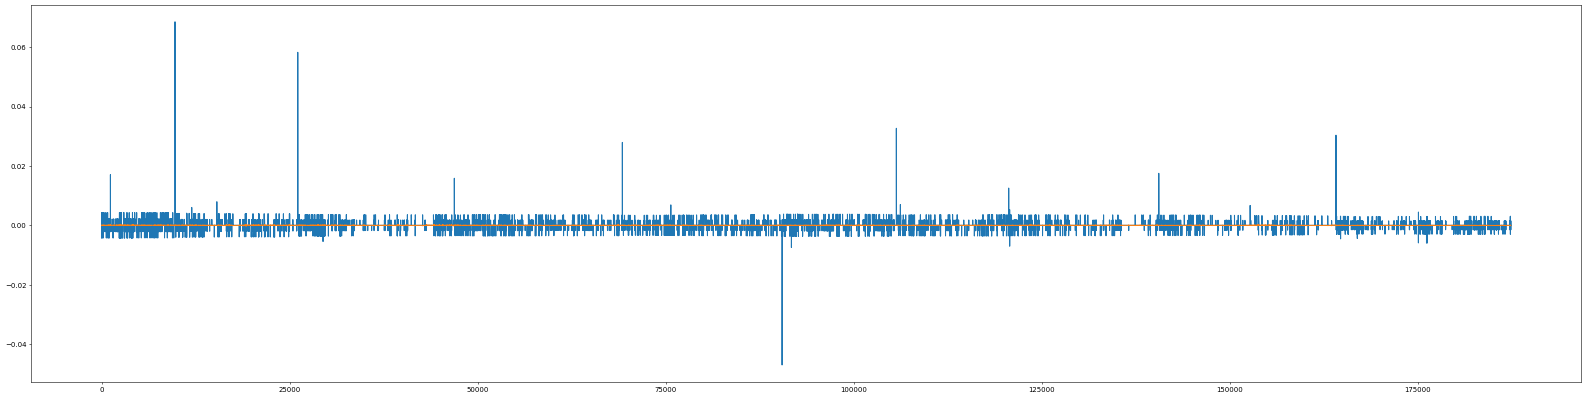

In [20]:
#train error
X_t1 = model_1.predict(X_train)
plt.figure(figsize=(40,10),dpi=50)
plt.plot(true_range(df2, Y_train))
plt.plot(true_range(df2, X_t1))

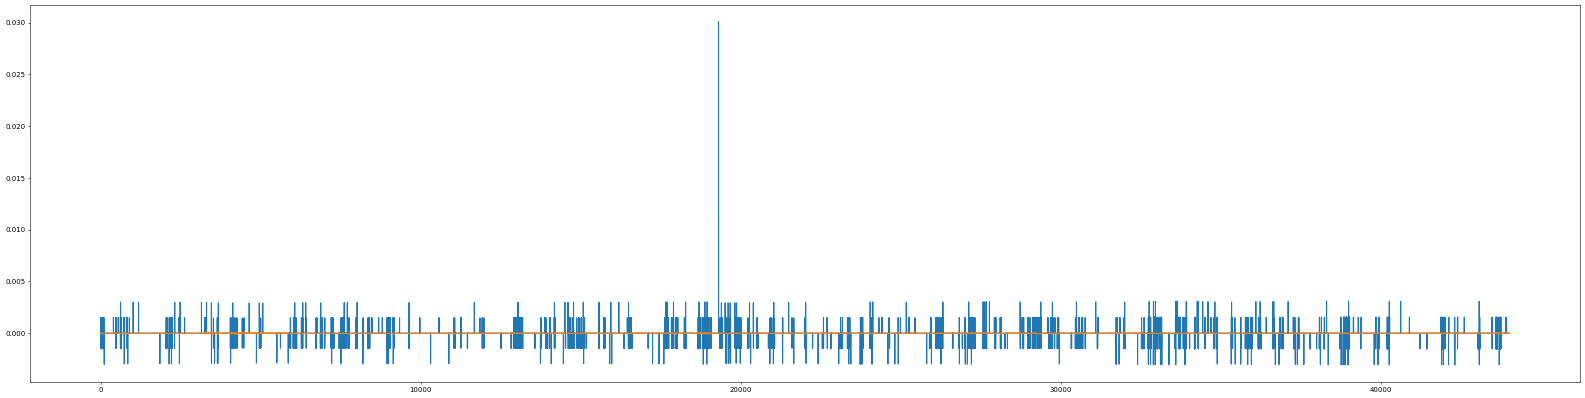

In [21]:
#test error
Xt1 = model_1.predict(X_test)
plt.figure(figsize=(40,10),dpi=50)
plt.plot(true_range(df2, Y_test))
plt.plot(true_range(df2, Xt1))

# strategy

In [22]:
#strategy setting
df['equity_value'] = pd.DataFrame(data = np.zeros((len(df), 1)), index = df.index[:])
df_test = df.iloc[187411: ]
df_train = df.iloc[0:187411]
#1~10 pred 11, hence start from 11
df_train = df_train.iloc[11:, :]
df_test = df_test.iloc[11:, :]
#calculate pred return
#train
df_train['pred_return'] = true_range(df2, X_t1)
#test
df_test['pred_return'] = true_range(df2, Xt1)

In [23]:
df_train = df_train.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)

In [93]:
#setting parameters
import itertools 
long_side, short_side = [0.00002, 0.000016, 0.000012, 0.000008, 0.000004], [-0.00003, -0.000035, -0.00004, -0.000045, -0.00005]
paras = list(itertools.product(long_side, short_side))
paras

[(2e-05, -3e-05),
 (2e-05, -3.5e-05),
 (2e-05, -4e-05),
 (2e-05, -4.5e-05),
 (2e-05, -5e-05),
 (1.6e-05, -3e-05),
 (1.6e-05, -3.5e-05),
 (1.6e-05, -4e-05),
 (1.6e-05, -4.5e-05),
 (1.6e-05, -5e-05),
 (1.2e-05, -3e-05),
 (1.2e-05, -3.5e-05),
 (1.2e-05, -4e-05),
 (1.2e-05, -4.5e-05),
 (1.2e-05, -5e-05),
 (8e-06, -3e-05),
 (8e-06, -3.5e-05),
 (8e-06, -4e-05),
 (8e-06, -4.5e-05),
 (8e-06, -5e-05),
 (4e-06, -3e-05),
 (4e-06, -3.5e-05),
 (4e-06, -4e-05),
 (4e-06, -4.5e-05),
 (4e-06, -5e-05)]

In [45]:
(df_train['pred_return'] > 0.00002).sum()

8588

In [44]:
(df_train['pred_return'] < -0.00005).sum()

2361

C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\U

C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-pa

C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-pa

C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-pa

C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-pa

C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\U

C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-pa

C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-pa

C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-pa

C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-pa

C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-pa

C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-pa

C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\U

C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-pa

C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-pa

C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-pa

C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-pa

C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-pa

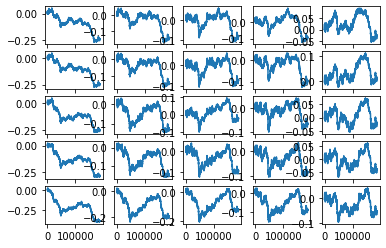

In [94]:
#main strategy (train set)
for l in range(len(paras)):
    df_train['side'] = pd.DataFrame(data = np.zeros((len(df_train), 1)), index = df_train.index[:])
    for j in range(len(df_train)):
        if df_train['pred_return'].iloc[j] > paras[l][0]:
            df_train['side'].iloc[j] = 1
        elif df_train['pred_return'].iloc[j] < paras[l][1]:
            df_train['side'].iloc[j] = -1
    date_idx = df_train['TxTime'].unique()
    equity_value = pd.DataFrame()
    for k in date_idx:
        df = df_train[df_train.TxTime == k]
        side = 0
        for i in range(len(df)):
            #first tick
            if i == 0:
                #ask1 may be 0, which means 漲停 (買不到)
                if (df['side'].iloc[i] == 1) and (df['Ask1'].iloc[i] != 0):
                    side = 1
                    df['mid1'].iloc[i] = df['Ask1'].iloc[i]
                    df['equity_value'].iloc[i] = 0
                elif (df['side'].iloc[i] == 1) and (df['Ask1'].iloc[i] == 0):
                    side = 0
                    df['equity_value'].iloc[i] = 0
                elif df['side'].iloc[i] == -1:
                    side = -1
                    df['mid1'].iloc[i] = df['Bid1'].iloc[i]
                    df['equity_value'].iloc[i] = - 0.0015
                else:
                    side = 0
                    df['equity_value'].iloc[i] = 0
            #last tick
            elif i == (len(df) - 1):
                if side == 1:
                    df['equity_value'].iloc[i] = (df['Bid1'].iloc[i] / df['mid1'].iloc[i-1] - 1) * (-1) - 0.0015
                #ask1 may be 0, which means 漲停 (買不到)
                elif (side == -1) and (df['Ask1'].iloc[i] != 0):
                    df['equity_value'].iloc[i] = (df['Ask1'].iloc[i] / df['mid1'].iloc[i-1] - 1)
                #收盤如果漲停，空單結不掉
                #elif (side == -1) and (df['Ask1'].iloc[i] == 0):
                    #df['equity_value'].iloc[i] = (df['Ask2'].iloc[i] / df['mid1'].iloc[i-1] - 1)
                else:
                    df['equity_value'].iloc[i] = 0
            else:
                if (side == 1 and df['side'].iloc[i] == 1) or (side == 1 and df['side'].iloc[i] == 0):
                    side = 1
                    df['equity_value'].iloc[i] = (df['mid1'].iloc[i] / df['mid1'].iloc[i-1] - 1) 
                elif side == 1 and df['side'].iloc[i] == -1:
                    side = 0
                    df['equity_value'].iloc[i] = (df['Bid1'].iloc[i] / df['mid1'].iloc[i-1] - 1) * (-1) - 0.0015
                    df['mid1'].iloc[i] = df['Bid1'].iloc[i]
                elif side == 0 and df['side'].iloc[i] == 0:
                    side = 0
                    df['equity_value'].iloc[i] = 0
                #ask1 may be 0, which means 漲停 (買不到)
                elif (side == 0) and (df['side'].iloc[i] == 1) and (df['Ask1'].iloc[i] != 0):
                    side = 1
                    df['equity_value'].iloc[i] = 0
                    df['mid1'].iloc[i] = df['Ask1'].iloc[i]
                elif (side == 0) and (df['side'].iloc[i] == 1) and (df['Ask1'].iloc[i] == 0):
                    side = 0
                    df['equity_value'].iloc[i] = 0
                elif side == 0 and df['side'].iloc[i] == -1:
                    side = -1
                    df['equity_value'].iloc[i] = - 0.0015
                    df['mid1'].iloc[i] = df['Bid1'].iloc[i]
                elif (side == -1 and df['side'].iloc[i] == 0) or (side == -1 and df['side'].iloc[i] == -1):
                    side = -1
                    df['equity_value'].iloc[i] = (df['mid1'].iloc[i] / df['mid1'].iloc[i-1] - 1) * (-1)
                #ask1 may be 0, which means 漲停 (買不到)
                elif (side == -1) and (df['side'].iloc[i] == 1) and (df['Ask1'].iloc[i] != 0):
                    side = 0
                    df['equity_value'].iloc[i] = (df['Ask1'].iloc[i] / df['mid1'].iloc[i-1] - 1)
                    df['mid1'].iloc[i] = df['Ask1'].iloc[i]
                elif (side == -1) and (df['side'].iloc[i] == 1) and (df['Ask1'].iloc[i] == 0):
                    side = -1
                    df['equity_value'].iloc[i] = (df['mid1'].iloc[i] / df['mid1'].iloc[i-1] - 1) *(-1)
        equity_value = pd.concat([equity_value, df[['equity_value']]])
    plt.subplot(5, 5, l+1)
    equity_value_ = np.cumsum(equity_value)
    plt.plot(equity_value_)

In [95]:
#test set
idx = [4, 9, 12, 14, 19]

In [96]:
for i in idx:
    print(paras[i])

(2e-05, -5e-05)
(1.6e-05, -5e-05)
(1.2e-05, -4e-05)
(1.2e-05, -5e-05)
(8e-06, -5e-05)


C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\U

C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\U

C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\U

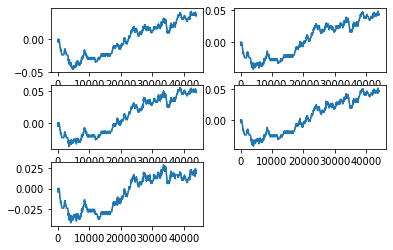

In [97]:
#main strategy (train set)
for l in range(len(idx)):
    df_test['side'] = pd.DataFrame(data = np.zeros((len(df_test), 1)), index = df_test.index[:])
    for j in range(len(df_test)):
        if df_test['pred_return'].iloc[j] > paras[idx[l]][0]:
            df_test['side'].iloc[j] = 1
        elif df_test['pred_return'].iloc[j] < paras[idx[l]][1]:
            df_test['side'].iloc[j] = -1
    date_idx = df_test['TxTime'].unique()
    equity_value = pd.DataFrame()
    for k in date_idx:
        df = df_test[df_test.TxTime == k]
        side = 0
        for i in range(len(df)):
            #first tick
            if i == 0:
                #ask1 may be 0, which means 漲停 (買不到)
                if (df['side'].iloc[i] == 1) and (df['Ask1'].iloc[i] != 0):
                    side = 1
                    df['mid1'].iloc[i] = df['Ask1'].iloc[i]
                    df['equity_value'].iloc[i] = 0
                elif (df['side'].iloc[i] == 1) and (df['Ask1'].iloc[i] == 0):
                    side = 0
                    df['equity_value'].iloc[i] = 0
                elif df['side'].iloc[i] == -1:
                    side = -1
                    df['mid1'].iloc[i] = df['Bid1'].iloc[i]
                    df['equity_value'].iloc[i] = - 0.0015
                else:
                    side = 0
                    df['equity_value'].iloc[i] = 0
            #last tick
            elif i == (len(df) - 1):
                if side == 1:
                    df['equity_value'].iloc[i] = (df['Bid1'].iloc[i] / df['mid1'].iloc[i-1] - 1) * (-1) - 0.0015
                #ask1 may be 0, which means 漲停 (買不到)
                elif (side == -1) and (df['Ask1'].iloc[i] != 0):
                    df['equity_value'].iloc[i] = (df['Ask1'].iloc[i] / df['mid1'].iloc[i-1] - 1)
                #收盤如果漲停，空單結不掉
                #elif (side == -1) and (df['Ask1'].iloc[i] == 0):
                    #df['equity_value'].iloc[i] = (df['Ask2'].iloc[i] / df['mid1'].iloc[i-1] - 1)
                else:
                    df['equity_value'].iloc[i] = 0
            else:
                if (side == 1 and df['side'].iloc[i] == 1) or (side == 1 and df['side'].iloc[i] == 0):
                    side = 1
                    df['equity_value'].iloc[i] = (df['mid1'].iloc[i] / df['mid1'].iloc[i-1] - 1) 
                elif side == 1 and df['side'].iloc[i] == -1:
                    side = 0
                    df['equity_value'].iloc[i] = (df['Bid1'].iloc[i] / df['mid1'].iloc[i-1] - 1) * (-1) - 0.0015
                    df['mid1'].iloc[i] = df['Bid1'].iloc[i]
                elif side == 0 and df['side'].iloc[i] == 0:
                    side = 0
                    df['equity_value'].iloc[i] = 0
                #ask1 may be 0, which means 漲停 (買不到)
                elif (side == 0) and (df['side'].iloc[i] == 1) and (df['Ask1'].iloc[i] != 0):
                    side = 1
                    df['equity_value'].iloc[i] = 0
                    df['mid1'].iloc[i] = df['Ask1'].iloc[i]
                elif (side == 0) and (df['side'].iloc[i] == 1) and (df['Ask1'].iloc[i] == 0):
                    side = 0
                    df['equity_value'].iloc[i] = 0
                elif side == 0 and df['side'].iloc[i] == -1:
                    side = -1
                    df['equity_value'].iloc[i] = - 0.0015
                    df['mid1'].iloc[i] = df['Bid1'].iloc[i]
                elif (side == -1 and df['side'].iloc[i] == 0) or (side == -1 and df['side'].iloc[i] == -1):
                    side = -1
                    df['equity_value'].iloc[i] = (df['mid1'].iloc[i] / df['mid1'].iloc[i-1] - 1) * (-1)
                #ask1 may be 0, which means 漲停 (買不到)
                elif (side == -1) and (df['side'].iloc[i] == 1) and (df['Ask1'].iloc[i] != 0):
                    side = 0
                    df['equity_value'].iloc[i] = (df['Ask1'].iloc[i] / df['mid1'].iloc[i-1] - 1)
                    df['mid1'].iloc[i] = df['Ask1'].iloc[i]
                elif (side == -1) and (df['side'].iloc[i] == 1) and (df['Ask1'].iloc[i] == 0):
                    side = -1
                    df['equity_value'].iloc[i] = (df['mid1'].iloc[i] / df['mid1'].iloc[i-1] - 1) *(-1)
        equity_value = pd.concat([equity_value, df[['equity_value']]])
    plt.subplot(3, 2, l+1)
    equity_value_ = np.cumsum(equity_value)
    plt.plot(equity_value_)